![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance:

- **Create a pandas DataFrame called best_math_schools containing the "school_name" and "average_math" score for all schools where the results are at least 80% of the maximum possible score**, sorted by "average_math" in descending order.
- **Identify the top 10 performing schools based on scores across the three SAT sections**, storing as a pandas DataFrame called top_10_schools containing the school name and a column named "total_SAT", with results sorted by total_SAT in descending order.*
- **Locate the NYC borough with the largest standard deviation for "total_SAT"**, storing as a DataFrame called largest_std_dev with "borough" as the index and three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT", and "std_SAT" for the standard deviation of "total_SAT". Round all numeric values to two decimal places.

As usual, importing Pandas and creating the DataFrame from the .csv file is the first step.

In [10]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")


                                         school_name    borough building_code   
0  New Explorations into Science, Technology and ...  Manhattan          M022  \
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7  


To identify the best-performing schools in math, a DataFrame named best_math_schools has been created. It includes the "school_name" and "average_math" score for schools where math results are at least 80% of the maximum possible score. The DataFrame is then sorted by "average_math" in descending order.

Before delving into the data, it's essential to note that focusing on math performance provides valuable insights into the academic strengths of schools.

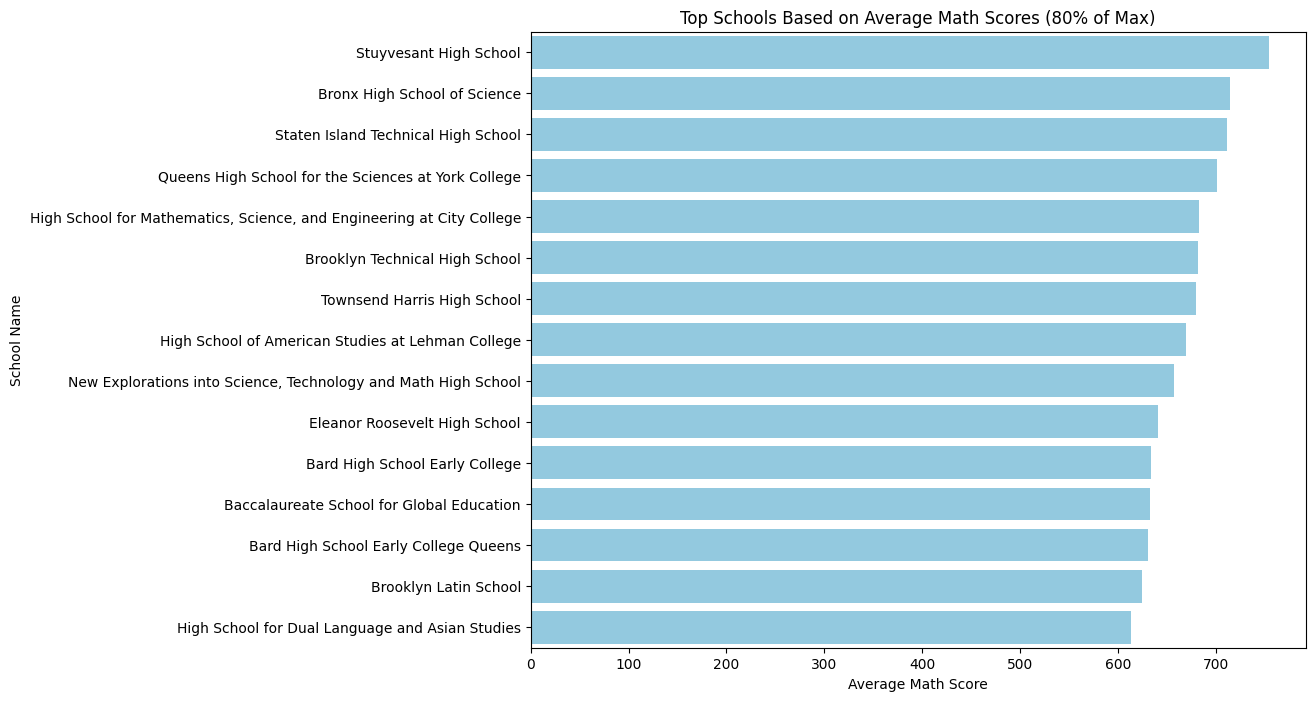

The maximum score possible in Math was:  754

The previous schools are spread across the following boroughs: 
 borough
Manhattan        0.40
Queens           0.27
Bronx            0.13
Brooklyn         0.13
Staten Island    0.07
Name: proportion, dtype: float64


In [45]:
# Calculate the maximum possible score
max_score = schools["average_math"].max()

# Filter schools with results at least 80% of the maximum score
filtered_df = schools[schools["average_math"] >= max_score * 0.8]

# Sort by average math in descending order
best_math_schools = filtered_df.sort_values(by="average_math", ascending=False)

# Bar plot of average_math scores for top schools
plt.figure(figsize=(10, 8))
sns.barplot(x="average_math", y="school_name", data=best_math_schools, color="skyblue")
plt.title('Top Schools Based on Average Math Scores (80% of Max)')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.show()

print("The maximum score possible in Math was: ", max_score)

print("\nThe previous schools are spread across the following boroughs: \n", best_math_schools['borough'].value_counts(normalize=True).round(2))


Analyzing the schools with the highest math scores sheds light on institutions excelling in a critical subject, indicating potential areas of expertise and educational excellence. Considering the 80% mark at 603.2, these are the schools which went over the mark. Note that they are spread over the NY area, though most of them are in Manhattan.

The top 10 performing schools across all three SAT sections are identified and stored in the DataFrame top_10_schools. This DataFrame includes the school name and a column named "total_SAT," with results sorted by total SAT scores in descending order.

Considering performance across all three SAT sections provides a comprehensive overview of schools excelling holistically in literacy, numeracy, and writing skills.

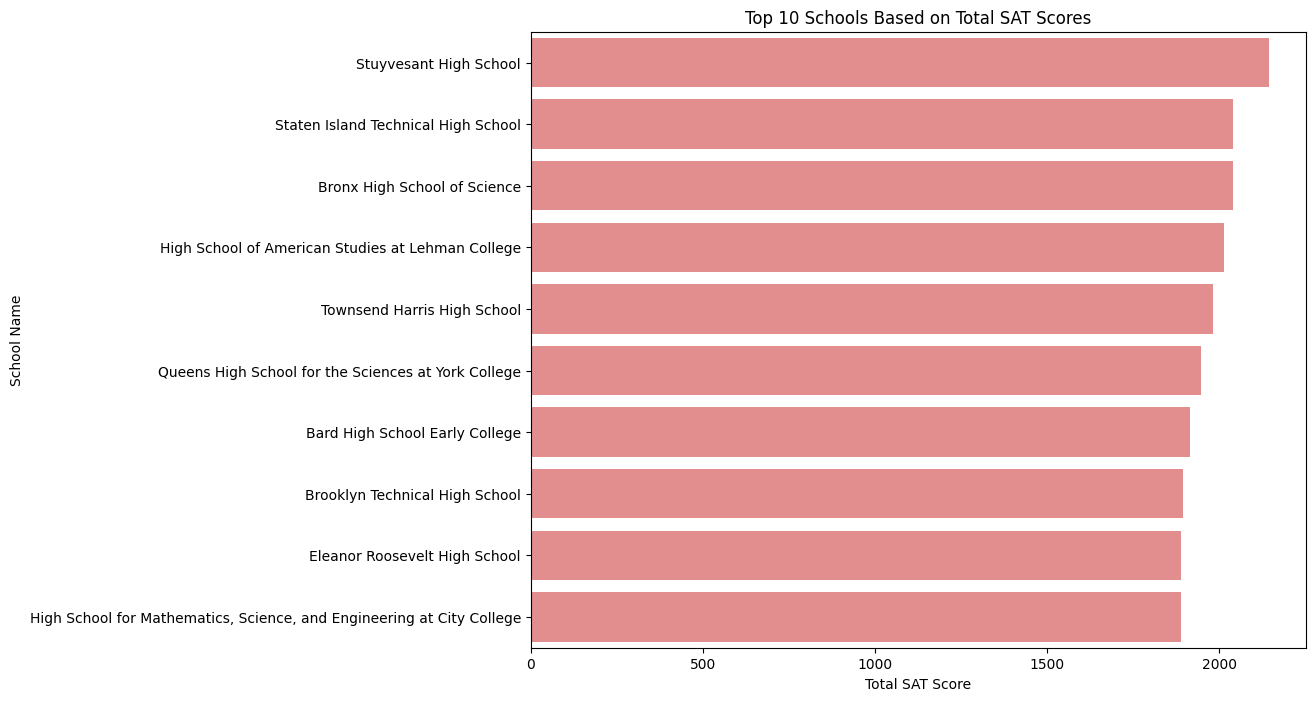

The following boroughs got the top 10:  borough
Manhattan        0.4
Bronx            0.2
Queens           0.2
Staten Island    0.1
Brooklyn         0.1
Name: proportion, dtype: float64


In [46]:
# Calculate the total SAT score for each school
schools["total_SAT"] = schools[["average_reading", "average_writing", "average_math"]].sum(axis=1)

# Select the top 10 schools based on total SAT score
top_10_schools = schools.nlargest(10, "total_SAT")

# Horizontal bar plot of total SAT scores for top 10 schools
plt.figure(figsize=(10, 8))
sns.barplot(x="total_SAT", y="school_name", data=top_10_schools, color="lightcoral")
plt.title('Top 10 Schools Based on Total SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.show()

print("The following boroughs got the top 10: ", top_10_schools['borough'].value_counts(normalize=True))

Identifying the top 10 schools based on total SAT scores helps recognize institutions that consistently demonstrate excellence across various academic domains. Stuyvesant High School proved to be a jack of all trades, winning both in math and in the overall test score. Manhattan proved once again to have the majority of the top performing schools.

The third question involves locating the NYC borough with the largest standard deviation for "total_SAT." The resulting DataFrame, named largest_std_dev, has "borough" as the index and includes three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT," and "std_SAT" for the standard deviation of "total_SAT."

Examining the standard deviation across boroughs allows us to identify the level of variability in SAT scores, indicating the consistency or diversity of educational outcomes.

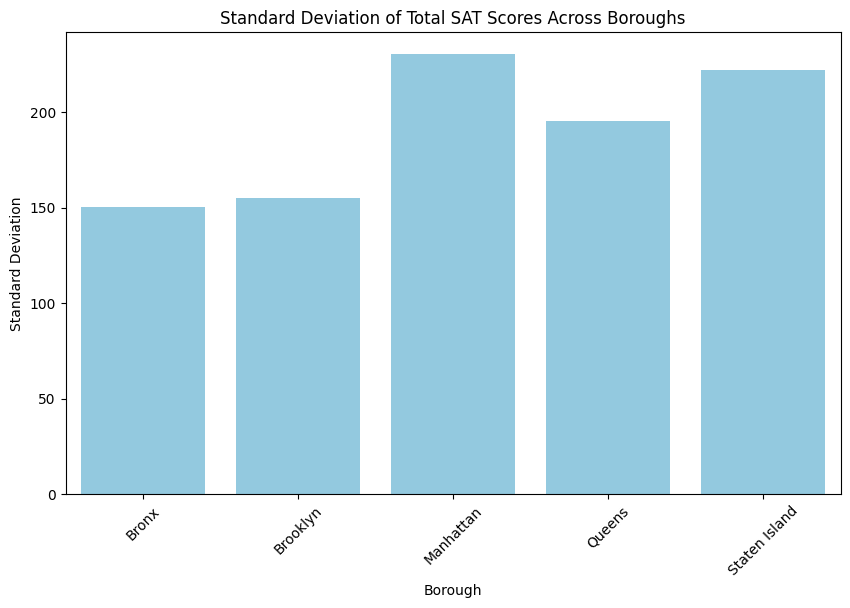

In [49]:
# Group by 'borough' and calculate the required statistics
borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

# Rename the columns
borough_stats.columns = ['num_schools', 'average_SAT', 'std_SAT']

# Find the borough with the largest standard deviation for 'total_SAT'
largest_std_dev = borough_stats.nlargest(1, 'std_SAT')

# Bar plot of standard deviation across boroughs
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_stats.index, y='std_SAT', data=borough_stats, color='skyblue')
plt.title('Standard Deviation of Total SAT Scores Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()

The borough with the largest standard deviation provides insights into the educational landscape—whether it exhibits diverse performance levels or a more consistent academic environment. Considering how wealthy Manhattan is, and how investment in education occurs in accordance with different variables, Manhattan has some work to do in order to level their schools, they have the biggest deviation across all boroughs.

Analyzing the performance of New York City public schools in terms of SAT scores is crucial for various stakeholders, including education professionals, policymakers, researchers, and parents. In this project, we delved into key questions to gain insights into the educational landscape.

**Best Performing Schools in Math:**

We identified schools with math scores at least 80% of the maximum possible score (604 points).
- A bar plot illustrated the distribution of schools based on their average math scores.
- Insight: This allowed us to pinpoint the top-performing schools in math, providing valuable information for educators and parents.

**Top 10 Performing Schools Across All SAT Sections:**

We calculated the total SAT score for each school and selected the top 10 based on total scores.
- The analysis provided a comprehensive view of schools excelling in all three SAT sections.
- Insight: This information is valuable for students, parents, and policymakers interested in schools with consistently high overall performance.

**Borough Analysis for Total SAT Scores:**

We aggregated statistics for each borough, including the number of schools, average SAT scores, and standard deviation.
- A bar plot visually represented the standard deviation across different boroughs.
- Insight: The standard deviation plot highlighted variations in SAT scores, aiding policymakers in understanding the educational diversity and potential areas for targeted interventions.


In conclusion, this project offers valuable insights into the performance of NYC public schools, enabling stakeholders to make informed decisions about education. The visualizations provide a clear and accessible representation of school data, facilitating a better understanding of the educational landscape in the city. Continued analysis and exploration of such data are essential for ongoing improvements in the education system.